<a href="https://colab.research.google.com/github/elemnurguner/data-ai-projects/blob/main/iriscicegisiniflandirmasi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

🌸 Iris Çiçeği Türleri Sınıflandırması: k-NN Algoritması ile Makine Öğrenimi Projesi
Bu proje, Iris çiçeğinin 3 farklı türünü (setosa, versicolor, virginica) makine öğrenimi kullanarak sınıflandırmayı amaçlar.
Kullanılan teknikler: Veri analizi, ölçeklendirme, k-NN algoritması, hiperparametre optimizasyonu.

🔍 Projenin Amacı
Iris veri setindeki 4 özelliği (sepal length, sepal width, petal length, petal width) kullanarak çiçek türlerini doğru bir şekilde tahmin eden bir model oluşturmak ve makine öğrenimi sürecini adım adım göstermek.

1. Kütüphaneleri Yükle
2. Veriyi Yükle ve İncele
3. Veriyi Ölçeklendir
4. Modeli Eğit ve Değerlendir
5. Görselleştir
6. Hiperparametre Optimizasyonu



İlk olarak, gerekli kütüphaneleri yükleyelim.

In [ ]:
# Gerekli kütüphaneleri yükle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
# Iris veri setini yükle
iris = load_iris()
X = iris.data
y = iris.target

# Veriyi bir DataFrame'e dönüştür
df = pd.DataFrame(X, columns=iris.feature_names)
df['species'] = y

# Veriyi keşfet
print(df.head())
print(df.info())
print(df.describe())
print(df['species'].value_counts())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
dtypes:

In [ ]:
# Eksik veri kontrolü
print(df.isnull().sum())

# Veriyi ölçeklendirme
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64


In [ ]:
# Veriyi eğitim ve test setlerine ayır
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

Basit Bir Makine Öğrenmesi Modeli (k-NN) Kullanarak Sınıflandırma Yap
k-NN (k-En Yakın Komşu) modelini kullanarak sınıflandırma yapalım.

In [ ]:
# k-NN modelini oluştur ve eğit
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Test seti üzerinde tahmin yap
y_pred = knn.predict(X_test)

Modelin performansını değerlendirelim.

In [ ]:
# Modelin performansını değerlendir
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))


Sonuçları görselleştirelim.

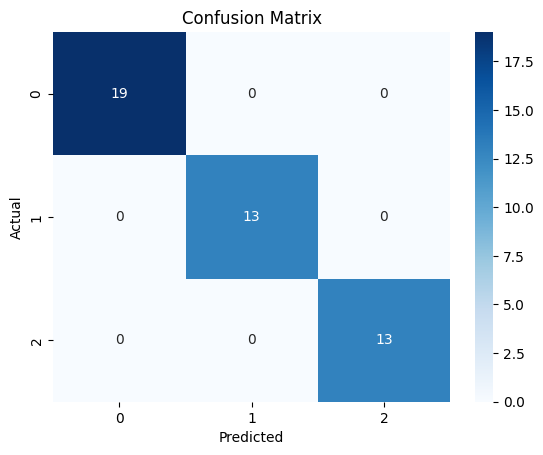

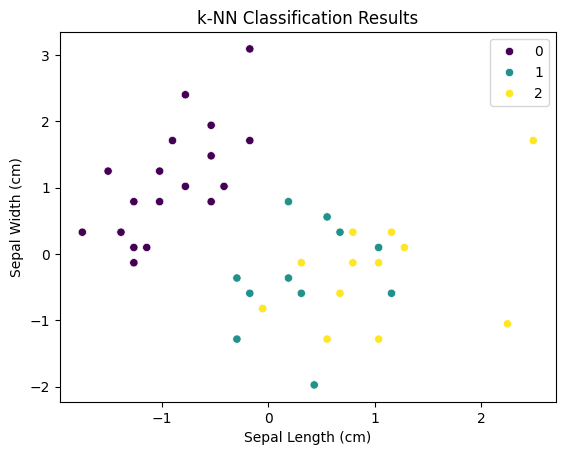

In [ ]:
# Confusion Matrix'i görselleştir
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Sınıflandırma raporunu görselleştir
sns.scatterplot(x=X_test[:, 0], y=X_test[:, 1], hue=y_pred, palette='viridis')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('k-NN Classification Results')
plt.show()

In [ ]:
# Hiperparametre ayarlaması (örneğin, k değerini değiştir)
k_values = range(1, 10)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

# En iyi k değerini bul
best_k = k_values[np.argmax(accuracies)]
print(f"En iyi k değeri: {best_k}")

# En iyi k değeri ile modeli tekrar eğit
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Yeni Accuracy Score:")
print(accuracy_score(y_test, y_pred))

En iyi k değeri: 3
Yeni Accuracy Score:
1.0
